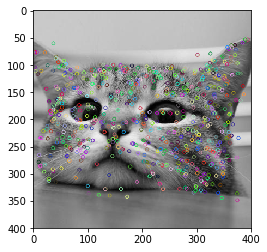

In [69]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('mycat.jpg')
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

sift = cv2.xfeatures2d.SIFT_create()
kp = sift.detect(gray,None)

img=cv2.drawKeypoints(gray,kp, None)

plt.imshow(img)
plt.show()

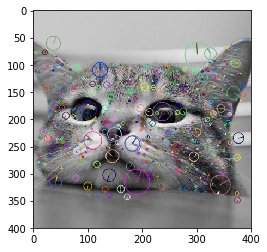

In [70]:
img = cv2.drawKeypoints(gray, kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(img)
plt.show()

In [82]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img1 = cv2.imread('sanmol.jpg',0) 
img2 = cv2.imread('sanmol-foto.jpg',0) 

# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary

flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(des1,des2,k=2)

matches

[[<DMatch 000001DC8A804EB0>, <DMatch 000001DC8AA347D0>],
 [<DMatch 000001DC8AA347F0>, <DMatch 000001DC8AA34830>],
 [<DMatch 000001DC89FF3950>, <DMatch 000001DC8A785FB0>],
 [<DMatch 000001DC8A835A50>, <DMatch 000001DC8A835A30>],
 [<DMatch 000001DC8A835A10>, <DMatch 000001DC8A8358F0>],
 [<DMatch 000001DC8A835630>, <DMatch 000001DC8A8355B0>],
 [<DMatch 000001DC8A8355F0>, <DMatch 000001DC8A835590>],
 [<DMatch 000001DC8A835550>, <DMatch 000001DC8A8355D0>],
 [<DMatch 000001DC8A835090>, <DMatch 000001DC8A835430>],
 [<DMatch 000001DC8A835A70>, <DMatch 000001DC8A835A90>],
 [<DMatch 000001DC8A835AB0>, <DMatch 000001DC8A835AD0>],
 [<DMatch 000001DC8A835AF0>, <DMatch 000001DC8A835B10>],
 [<DMatch 000001DC8A835B30>, <DMatch 000001DC8A835B50>],
 [<DMatch 000001DC8A835B70>, <DMatch 000001DC8A835B90>],
 [<DMatch 000001DC8A835BB0>, <DMatch 000001DC8A835BD0>],
 [<DMatch 000001DC8A835BF0>, <DMatch 000001DC8A835C10>],
 [<DMatch 000001DC8A835C30>, <DMatch 000001DC8A835C50>],
 [<DMatch 000001DC8A835C70>, <D

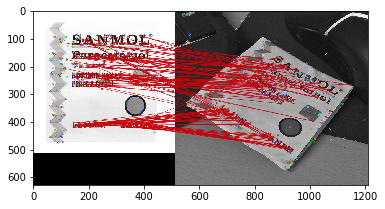

(<matplotlib.image.AxesImage at 0x1dc8a7b8b38>, None)

In [83]:
# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]

draw_params = dict(matchColor = (200,0,10),
                   matchesMask = matchesMask,
                   flags = 0)

img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)

plt.imshow(img3,),plt.show()